# Simple Moving Average (SMA)

The [SMA filter](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) can be used for removing noise from a data set and producing a smoother curve, for example.

## Import the required stuff

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## My functions

In [2]:
def plot(x, y, z = None, w = None, labely = None, labelz = None, labelw = None):
    '''Plot two superposed graphs of y, z and w gainst x.
    
    input
    x: numpy array 1D - abscissa values.
    y: numpy array 1D - ordinate values of the first data set.
    z: numpy array 1D - ordinate values of the second data 
       set (default is None).
    w: numpy array 1D - ordinate values of the third data 
       set (default is None).
    labely: string - label of the first data set (default is None).
    labelz: string - label of the second data set (default is None).
    labelw: string - label of the third data set (default is None).
    
    output
    matplotlib figure
    '''
    
    fig = plt.figure(figsize=(10,6))

    if labely is not None:
        plt.plot(x, y, '-b', linewidth = 1., label=labely)
    else:
        plt.plot(x, y, '-b', linewidth = 1.)
        
    if z is not None:
        if labelz is not None:
            plt.plot(x, z, '-k', linewidth = 1., label=labelz)
        else:
            plt.plot(x, z, '-k', linewidth = 1.)
            
    if w is not None:
        if labelw is not None:
            plt.plot(x, w, '-r', linewidth = 1., label=labelw)
        else:
            plt.plot(x, w, '-r', linewidth = 1.)
    
    plt.ylabel('data', fontsize = 22)
    plt.xlabel('$\\theta$ ($^{\circ}$)', fontsize = 22)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.grid()

    plt.legend(loc='best', fontsize=16)

    fig.tight_layout()

    plt.show()    

In [3]:
def sma1d(data, window_size):
    '''
    Apply a simple moving average filter with
    size window_size to data.
    
    input
    data: numpy array 1D - data set to be filtered.
    window_size: int - number of points forming the window.
                 It must be odd. If not, it will be increased
                 by one.
                 
    output
    filtered_data: numpy array 1D - filtered data. This array has the
                   same number of elementos of the original data.
    '''
    
    assert data.size >= window_size, \
        'data must have more elements than window_size'
    
    #verify if window_size is odd
    if window_size%2 == 0:
        window_size += 1
    
    assert window_size >= 3, 'increase the window_size'
    
    #lost points at the extremities
    i0 = window_size//2

    #number of non-null points of the filtered data
    N = data.size - 2*i0
    
    assert N > 0, 'decrease the window_size'

    filtered_data = np.empty_like(data)

    filtered_data[:i0] = 0.
    filtered_data[-1:-i0-1:-1] = 0.

    for i in range(N):
        filtered_data[i0+i] = np.mean(data[i:i+window_size])
        
    return filtered_data

## Create a data set

In [4]:
theta = np.linspace(0., 6.*np.pi, 300)

In [5]:
theta_degree = np.rad2deg(theta)

In [6]:
noise_free_data = 5.0*np.cos(theta)

In [7]:
noise = np.random.normal(0., 2.5, theta.size)

In [8]:
noisy_data = noise_free_data + noise

## Plot the data

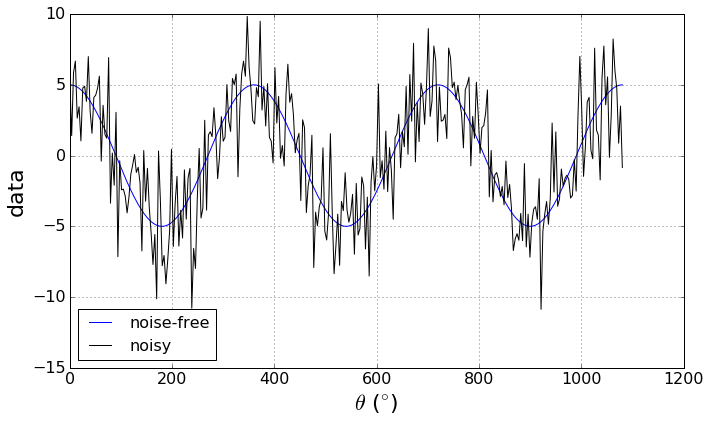

In [9]:
plot(theta_degree, noise_free_data, noisy_data, labely='noise-free', labelz='noisy')

## Testing

### Test 1

##### input

In [10]:
input1 = np.ones(15)

#### My result

In [11]:
window_size1 = 3
output_calculated1 = sma1d(input1,window_size1)

##### Reference result

In [12]:
output_reference1 = np.ones_like(input1)

##### Comparison

In [13]:
i0 = window_size1//2
np.allclose(output_reference1[i0:-i0], output_calculated1[i0:-i0])

True

## Application to synthetic data

In [26]:
filtered_data = sma1d(noisy_data, 15)

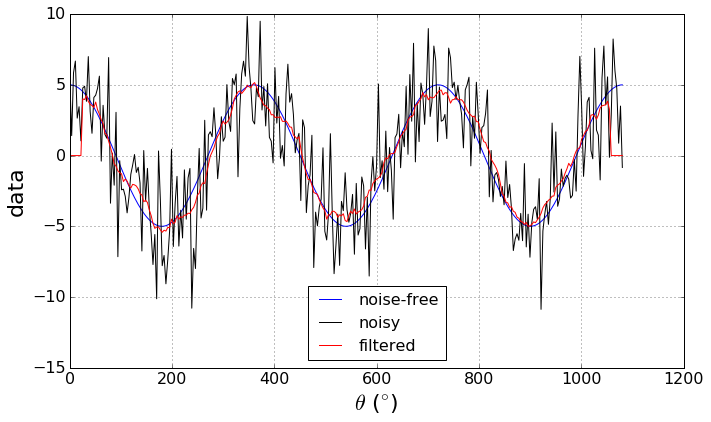

In [27]:
plot(theta_degree, noise_free_data, 
                   noisy_data, 
                   filtered_data, labely='noise-free', labelz='noisy', labelw='filtered')